In [71]:
import pandas as pd
from numpy import argmax
import statistics
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from zipfile import ZipFile
file_name = "New Dataset/system_calls.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Unzipped system_calls.zip')

Unzipped system_calls.zip


In [3]:
# Reading counts.txt and storing in panads df
counts_text = pd.read_csv("New Dataset/counts.txt")

In [4]:
# Opening the extracted sys_calls file and replacing ':' with ','

# List that holds the priginal dataset in string format
system_calls = []
i = 0

with open('system_calls.txt') as f:
    while True:
        request = f.readline()
        if(len(request) == 0):
            break
        system_calls.append(request)
        i += 1
for i in range(len(system_calls)):
    system_calls[i] = system_calls[i].replace(":",",")

In [5]:
len(system_calls)
system_calls[0][-1]

'\n'

In [6]:
# Saving replaced file as "dataset.txt"
f = open("dataset.txt", "w")
for i in range(len(system_calls)):
    f.write(system_calls[i])
f.close()

# dataset.txt which contains IDs and system call sequences can now be used as a csv 

In [7]:
# Printing count.txt using column names
counts_text['ID']

0        15403_12_1558061203352552595
1        15403_12_1558061203873994946
2        15403_12_1558061203901555711
3        15403_12_1558061203925100262
4        15403_12_1558061203961228441
                     ...             
46682    15698_12_1558061453221782438
46683    15698_12_1558061453405086529
46684    15698_12_1558061453589605045
46685    15698_12_1558061453776009239
46686    15698_12_1558061453953786306
Name: ID, Length: 46687, dtype: object

In [8]:
# Dictionary that maps request ID to completion time
ID_to_Time_dict = {}

# This loop run through the counts_txt table and maps the keys(IDs) to the values (Time taken)
for i in range(len(counts_text['Time'])):
    ID_to_Time_dict[counts_text['ID'][i]] = counts_text['Time'][i]


In [9]:
len(ID_to_Time_dict)

45413

In [10]:
# List that hold all the request time taken
req_durations = []

file = open("Dataset.txt","w")

def write_to_file(req):
    if req[0] in ID_to_Time_dict:
        file.write(req[0])
        file.write(",")
        file.write(str(ID_to_Time_dict[str(req[0])]))
        req_durations.append(int(ID_to_Time_dict[str(req[0])]))
        file.write(",")
        for i in range(1,len(req)):
            file.write(req[i])
            if i != len(req) -1 :
                file.write(",")
    

for i in range(len(system_calls)):
    write_to_file(system_calls[i].split(","))

file.close()


In [11]:
file = open("Dataset.txt","r")
requests= []
while True:
    line = file.readline()
    if(len(line) == 0):
        break
    requests.append(line.split(","))
    


In [12]:
len(requests)

45413

In [13]:
# List which holds all unique system calls present in the dataset
unique_system_calls = []

for i in range(len(requests)):
    for j in range(2,len(requests[i])):
        if requests[i][j] not in unique_system_calls and requests[i][j] != '$\n':
            unique_system_calls.append(requests[i][j])
        

In [14]:
# Unique system calls present in the dataset

print(unique_system_calls)
print(len(unique_system_calls))

['getsockname', 'fcntl', 'mmap', 'read', 'newstat', 'open', 'newfstat', 'close', 'brk', 'setitimer', 'rt_sigaction', 'rt_sigprocmask', 'getcwd', 'chdir', 'access', 'getdents', 'sysinfo', 'socket', 'connect', 'poll', 'recvfrom', 'sendto', 'newlstat', 'munmap', 'madvise', 'nanosleep', 'writev', 'write', 'times', 'shutdown', 'accept4']
31


In [15]:
# Mapping system call names to unique integers
system_call_to_value_dict = {}
num = 1
for i in range(len(unique_system_calls)):
    system_call_to_value_dict[str(unique_system_calls[i])] = num
    num += 1

In [16]:
# Dictionary holding the mappings
system_call_to_value_dict 

{'getsockname': 1,
 'fcntl': 2,
 'mmap': 3,
 'read': 4,
 'newstat': 5,
 'open': 6,
 'newfstat': 7,
 'close': 8,
 'brk': 9,
 'setitimer': 10,
 'rt_sigaction': 11,
 'rt_sigprocmask': 12,
 'getcwd': 13,
 'chdir': 14,
 'access': 15,
 'getdents': 16,
 'sysinfo': 17,
 'socket': 18,
 'connect': 19,
 'poll': 20,
 'recvfrom': 21,
 'sendto': 22,
 'newlstat': 23,
 'munmap': 24,
 'madvise': 25,
 'nanosleep': 26,
 'writev': 27,
 'write': 28,
 'times': 29,
 'shutdown': 30,
 'accept4': 31}

In [17]:
# Converting system calls names to unique integers
for i in range(len(requests)):
    for j in range(len(requests[i])):
            if requests[i][j] in system_call_to_value_dict:
                requests[i][j] = int(system_call_to_value_dict[requests[i][j]])

In [18]:
# Statistics of the time taken by the requests

nano = 100000000

# List containing numbers from 1 to n, where n = total number of requests
num_requests = [i for i in range(1,len(req_durations)+1)]
# List containing durations of requests
req_durations = [req_durations[i]/nano for i in range(len(req_durations))]
# list containing length of requests
req_lengths = [len(requests[i]) for i in range(len(requests))]


# variables for storing Duration stats
maximum_dur = max(req_durations)
minimum_dur = min(req_durations)
mean_dur = statistics.mean(req_durations)
std_dev_dur = statistics.stdev(req_durations)

print("STATISTICS ON DURATION")
print("Maximum: ", maximum_dur)
print("Minimum: ", minimum_dur)
print("Mean: ", mean_dur)
print("Standard Deviation: ", std_dev_dur)



STATISTICS ON DURATION
Maximum:  223.81729449
Minimum:  0.00143172
Mean:  1.3914579438962411
Standard Deviation:  5.113169024522863


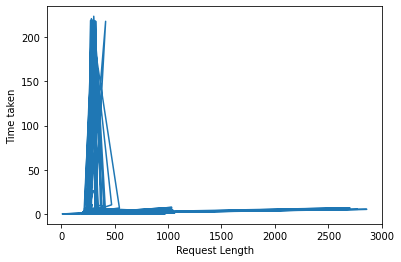

In [19]:
plt.plot(req_lengths,req_durations)
plt.xlabel("Request Length")
plt.ylabel("Time taken")
plt.show()

In [20]:
# List containing length/duration ratio of requests
length_duration_ratio = []

for i in range(len(req_durations)):
    length_duration_ratio.append(req_lengths[i]/req_durations[i])



In [21]:
#variables for storing Duration stats

maximum_ratio = max(length_duration_ratio)
minimum_ratio = min(length_duration_ratio)
mean_ratio = statistics.mean(length_duration_ratio)
std_dev_ratio = statistics.stdev(length_duration_ratio)

print("STATISTICS ON RATIO(LENGTH/DURATION)")
print("Maximum: ", maximum_ratio)
print("Minimum: ", minimum_ratio)
print("Mean: ", mean_ratio)
print("Standard Deviation: ", std_dev_ratio)

STATISTICS ON RATIO(LENGTH/DURATION)
Maximum:  9079.987707093565
Minimum:  1.2637585718500415
Mean:  225.642070835443
Standard Deviation:  108.05662936006965


In [22]:
# Threshod for anomalies
th = mean_ratio + (std_dev_ratio)
counter = 0

for i in range(len(length_duration_ratio)):
    if length_duration_ratio[i] > th:
        counter += 1

In [23]:
th

333.69870019551263

In [24]:
counter

4685

In [25]:
len(requests)

45413

In [26]:
# List contaning all the anomolous requests
anomaly = []
# List containing all the normal requests
normal = []


def append_arr(arr,n):
    temp = []
    del arr[-1]
    if n == 1:
        for i in range(2,len(arr)):
            temp.append(arr[i])
    else:
        for i in range(2,len(arr)):
            temp.append(arr[i])
    return temp 
        
    
for i in range(len(length_duration_ratio)):
    if length_duration_ratio[i] > th:
        anomaly.append(append_arr(requests[i],1))
    else:
        normal.append(append_arr(requests[i],0))
        


In [27]:
len(anomaly)

4685

In [28]:
#Generating one hot vectors
dict = {}
vocab_size = 60

for x in range(vocab_size):
    arr=[]
    arr = [0 for i in range(vocab_size)] 
    arr[x] = 1
    dict[x] = arr

In [36]:
#Sequence size
n = 15
#N-Gram
m = 3

In [37]:
# This method receives a request array and returns one hot encoded version of that array
def generate_trainSet(request):
    temp = []
    for sys_call in request:
        temp.append(dict[sys_call])
    return temp

# This method recevies a request array, start and  end of the request and populates x_train and y_train
# with returned one hot version from the generate_trainSet method
def split_request(source, target, request, start, end):
    while(len(request)-start >= n+m):
        source.append(generate_trainSet(request[start:end]))
        start += m
        end += m
        target.append(generate_trainSet(request[start:end]))

In [59]:
x_train = []
y_train = [] 

# Populating x_train and y_train with sources and targets
for i in range(int(len(normal)/30)):
    split_request(x_train, y_train, normal[i],0,n)

In [60]:
print(len(x_train))

104610


In [61]:
# Converting x_train and y_train into np arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

In [62]:
#x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(104610, 15, 60)


In [63]:
# split test data into training and testing sets
x_train, x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=4)

In [64]:
n_timesteps = n
n_features = vocab_size
numberOfUnits = 200

input= Input(shape=(n_timesteps, n_features))

lstm1 = LSTM(numberOfUnits,return_sequences=True, return_state=True)
all_state_h, state_h, state_c = lstm1(input) 
states = [state_h, state_c]

lstm2 = LSTM(numberOfUnits,return_sequences=True)
all_state_h = lstm2(all_state_h,initial_state=states)

dense = (Dense(n_features, activation='softmax'))
output = dense(all_state_h)
model_LSTM_return_sequences_return_state = Model(input,output,
                                name='model_LSTM_all_state_h_return_state')
model_LSTM_return_sequences_return_state.compile(loss='categorical_crossentropy', 
                                                 optimizer='adam',
                                                 metrics=['accuracy'])
model_LSTM_return_sequences_return_state.summary()

Model: "model_LSTM_all_state_h_return_state"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 15, 60)]     0           []                               
                                                                                                  
 lstm_4 (LSTM)                  [(None, 15, 200),    208800      ['input_3[0][0]']                
                                 (None, 200),                                                     
                                 (None, 200)]                                                     
                                                                                                  
 lstm_5 (LSTM)                  (None, 15, 200)      320800      ['lstm_4[0][0]',                 
                                                                

In [65]:
def train_test(model, X_train, y_train , 
               X_test, 	y_test, epochs=50, 
							        verbose=0, patience=5):
	# patient early stopping
	#es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1, patience=20)
	es = EarlyStopping(monitor='val_loss', mode='min', 
	                   verbose=1, patience=patience)
	# train model
	print('training for ',epochs,
	      ' epochs begins with',
				' EarlyStopping(monitor= val_loss ',
				' patience=',patience,')....')
	history=model.fit(X_train, y_train, validation_split= 0.1, epochs=epochs,  verbose=verbose, callbacks=[es])
	print(epochs,' epoch training finished...')

	# report training
	# list all data in history
	print(history.history.keys())
	# evaluate the model
	_, train_acc = model.evaluate(X_train, y_train, verbose=0)
	_, test_acc = model.evaluate(X_test, 	y_test, verbose=0)
	print('\nPREDICTION ACCURACY (%):')
	print('Train: %.3f, Test: %.3f' % (train_acc*100, test_acc*100))
	# summarize history for accuracy
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title(model.name+' accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()
	# summarize history for loss
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title(model.name+' loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

training for  50  epochs begins with  EarlyStopping(monitor= val_loss   patience= 5 )....
Epoch 28: early stopping
50  epoch training finished...
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

PREDICTION ACCURACY (%):
Train: 98.713, Test: 98.592


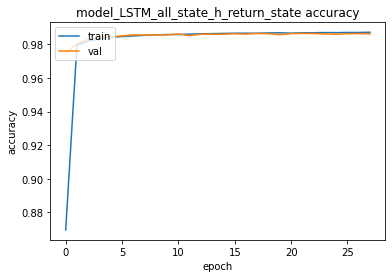

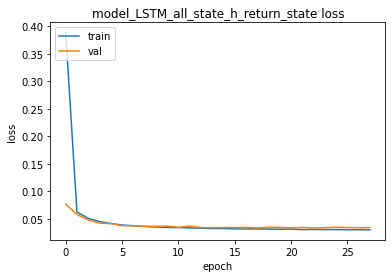

In [66]:
train_test(model_LSTM_return_sequences_return_state, x_train, y_train , x_test, y_test)

In [67]:
def one_hot_decode(arr):
    for index,num in enumerate(arr):
        if num == 1:
            return index

def decode(arr, three_d_array):
    for seq in three_d_array:
        temp = []
        for one_hot in seq:
            temp.append(one_hot_decode(one_hot))
        arr.append(temp)
    
        

In [68]:
def prediction_decode(arr, prediction):
    for seq in prediction:
        predict_temp = []
        for one_hot in seq:
            predict_temp.append(argmax(one_hot))
        arr.append(predict_temp)
    
    

In [97]:
# Decoded vectors x_test and y_test
x_test_decoded = []
y_test_decoded = []
i = 1

#For simplicity, test number
test_number = len(x_test)

while(i < test_number):
    decode(x_test_decoded,x_test[i-1:i])
    decode(y_test_decoded,y_test[i-1:i])
    i += 1

In [98]:
predictions = []
i = 1
while(i < test_number):
    prediction_decode(predictions, model_LSTM_return_sequences_return_state.predict(x_test[i-1:i]))
    i += 1



KeyboardInterrupt: 

In [ ]:
attack_source = []
attack_target = []
attack_predict = []




In [ ]:
for i in range(len(anomaly)):
    split_request(attack_source, attack_target, anomaly[i],0,n)

# Decoded vectors x_test and y_test
x_attack_decoded = []
y_attack_decoded = []
i = 1

print("length attack source: ", len(anomaly))

while(i < test_number):
    decode(x_attack_decoded,attack_source[i-1:i])
    decode(y_attack_decoded,attack_target[i-1:i])
    i += 1


In [ ]:
i = 1
while(i < test_number):
    prediction_decode(attack_predict, model_LSTM_return_sequences_return_state.predict(attack_source[i-1:i]))
    i += 1

In [ ]:
# perfect match
from nltk.translate.bleu_score import sentence_bleu
def calc_belu(target, prediction):
    reference = []
    candidate = []
    reference.append(target)
    candidate.extend(prediction)
    return sentence_bleu(reference, candidate, weights=(0, 0,5, 0.5))

In [ ]:
belu_scores_normal = []
belu_scores_attack = []



for i in range(len(y_test_decoded)):
    belu_scores_normal.append(calc_belu(y_test_decoded[i],predictions[i]))

for i in range(len(attack_predict)):
    belu_scores_attack.append(calc_belu(y_attack_decoded[i],attack_predict[i]))
    
    

In [ ]:
import statistics
print("Mean Normal: ", statistics.mean(belu_scores_normal))
print("Lowest Normal: ", min(belu_scores_normal))
print("Mean Attack: ", statistics.mean(belu_scores_attack))
print("Lowest Attack: ", min(belu_scores_attack))

count = 0
count_attack = 0
thresh = 0.95
for i in range(len(belu_scores_normal)):
    if (belu_scores_normal[i]<thresh):
        count += 1
    if (belu_scores_attack[i] > thresh):
        count_attack += 1
print("normal less than", thresh, " is " ,count/len(belu_scores_normal)*100)
print("attack more than", thresh, " is " ,count_attack/len(belu_scores_normal)*100)
